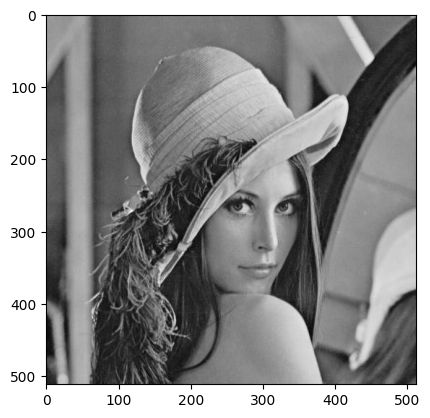

In [27]:
import numpy as np
from PIL import Image
#task1
def grayscale(image_array):
    R, G, B = image_array[:, :, 0], image_array[:, :, 1], image_array[:, :, 2]
    grayscale = ((0.3 * R) + (0.59 * G) + (0.11 * B))
    return grayscale

image = Image.open('/content/Lenna.jpg')
image_array = np.array(image)
grayscale_image = grayscale(image_array)

# Convert the grayscale image back to a PIL Image object
grayscale_image = Image.fromarray(grayscale_image.astype(np.uint8))

# Save the grayscale image
#gray = grayscale_img.save("grayscale.jpg")
img = plt.imread("grayscale.jpg")
plt.imshow(img, cmap='gray')
plt.show()


In [32]:
#task2
import json
import numpy as np

# Convert the grayscale image to a NumPy array
grayscale_data = np.array(grayscale_image)

# Create a dictionary to store the data
data = {
    "image_width": grayscale_image.width,
    "image_height": grayscale_image.height,
    "grayscale_image_data": grayscale_data.tolist()  # Convert the NumPy array to a list
}

# Save the data to a JSON file
with open("grayscale.json", "w") as json_file:
    json.dump(data, json_file)

task 3

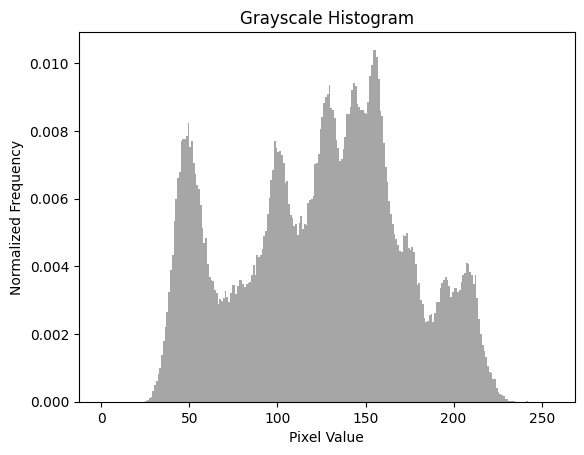

In [33]:
import matplotlib.pyplot as plt

# Define a function to create a histogram from the grayscale image
def make_histogram(image):
    # Flatten the 2D grayscale image into a 1D array
    flattened_image = np.ravel(image)

    # Create a histogram
    histogram, bins, _ = plt.hist(flattened_image, bins=256, range=(0, 256), density=True, color='gray', alpha=0.7)

    # Customize the plot
    plt.title("Grayscale Histogram")
    plt.xlabel("Pixel Value")
    plt.ylabel("Normalized Frequency")

    # Show the histogram plot
    plt.show()

# Call the function to create and plot the histogram
make_histogram(grayscale_image)

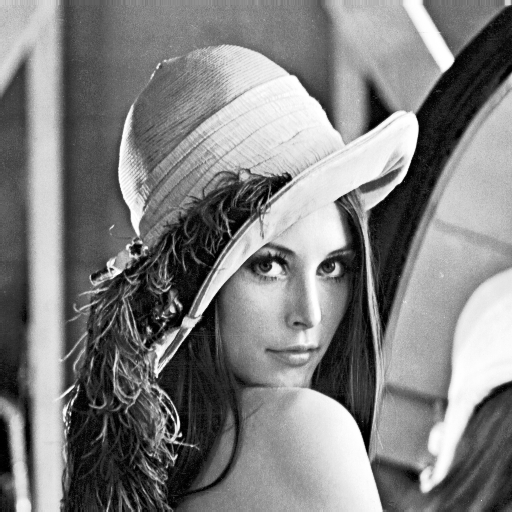

In [34]:
import numpy as np
def cumulative_sum(hist):
    cum_sum = np.cumsum(hist)
    return cum_sum
hist, _ = np.histogram(np.array(grayscale_image).ravel(), bins=256, range=(0, 256), density=True)
cumulative_histogram = cumulative_sum(hist)
min_val = np.min(cumulative_histogram)
max_val = np.max(cumulative_histogram)
equalized_histogram = ((cumulative_histogram - min_val) * 255) / (max_val - min_val)
equalized_histogram = np.round(equalized_histogram).astype(int)
equalized_image = equalized_histogram[grayscale_image]
equalized_image = Image.fromarray(equalized_image.astype(np.uint8))
equalized_image.save("lenna_equalized.jpg")
equalized_image

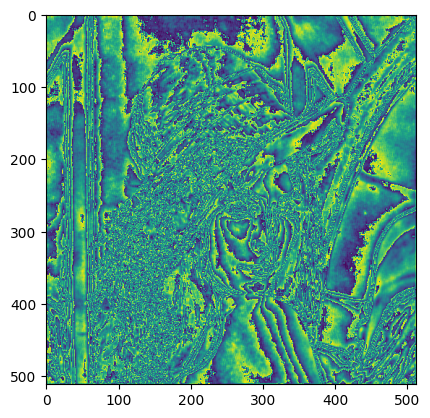

In [59]:
import numpy as np
from PIL import Image

def convolve(image, kernel):
    # Get the dimensions of the image and kernel
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape

    # Calculate the padding required for the convolution operation
    pad_height = (kernel_height - 1) // 2
    pad_width = (kernel_width - 1) // 2

    # Create a padded version of the image
    padded_image = np.zeros((image_height + 2 * pad_height, image_width + 2 * pad_width))
    padded_image[pad_height:-pad_height, pad_width:-pad_width] = image

    # Create an output array to store the result of the convolution operation
    output = np.zeros_like(image)

    # Perform the convolution operation
    for i in range(image_height):
        for j in range(image_width):
            output[i, j] = np.sum(kernel * padded_image[i:i + kernel_height, j:j + kernel_width])

    return output

# Resize the image to 512x512 pixels
resized_image = image.resize((512, 512))

# Convert the resized image to a grayscale numpy array
image_array = np.array(resized_image.convert('L'))

# Define the 3x3 kernel as a NumPy array
kernel = np.array([
    [3, 0, 3],
    [1, 0, 1],
    [3, 0, 3]
], dtype=np.float32)

# Apply the convolution operation with the kernel using convolve()
filtered_image = convolve(image_array, kernel)

# Convert the filtered image back to a PIL Image object
filtered_pil_image = Image.fromarray(filtered_image.astype(np.uint8))

filtered_pil_image.save("lena_filtered.png")

img = plt.imread("lena_filtered.png")
plt.imshow(img)
plt.show()
